In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [32]:
(xtr,ytr),(xts,yts)=mnist.load_data()
xtr.shape

(60000, 28, 28)

In [33]:
#(32,32,3) for CIFAR10, (28,28,1) for MNIST 
xtr=xtr.reshape(xtr.shape[0],28*28)
xts=xts.reshape(xts.shape[0],28*28)
xtr=xtr/255.0
xts=xts/255.0

lb=LabelBinarizer()
ytr=lb.fit_transform(ytr)
yts=lb.fit_transform(yts)

In [34]:
model=Sequential()
#3072 for CIFAR10, 784 for MNIST
model.add(Dense(128,input_shape=(784,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [35]:
h=model.fit(xtr,ytr,epochs=5,validation_data=(xts,yts))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2504 - accuracy: 0.9271 - val_loss: 0.1218 - val_accuracy: 0.9607
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9683 - val_loss: 0.0930 - val_accuracy: 0.9708
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9773 - val_loss: 0.0984 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.0894 - val_accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0985 - val_accuracy: 0.9722


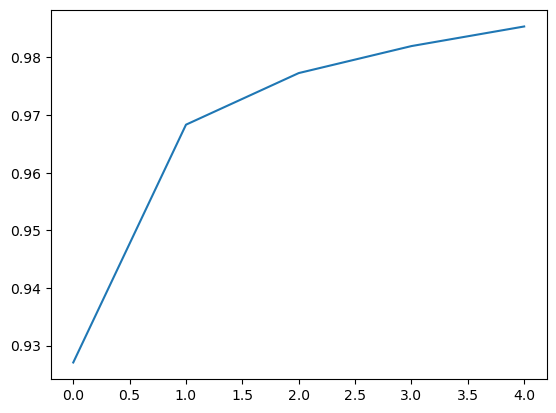

In [36]:
plt.plot(np.arange(0,5),h.history['accuracy'],label='acc')

In [37]:
predictions = model.predict(xts)
print(classification_report(yts.argmax(axis=1),predictions.argmax(axis=1)))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.94      0.98      0.96      1010
           4       0.99      0.96      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

